<a href="https://colab.research.google.com/github/ialkamal/project2-machine-learning/blob/master/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 (core)

## Imports

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Week 01

### Dataset 1

Src: https://www.kaggle.com/hellbuoy/car-price-prediction

**Description:**  A large data set of different types of cars across the US  market.

**Target:** Price
(*predict the sales price*)

**Type:** Regression

In [188]:
ds1 = pd.read_csv("/content/drive/MyDrive/Coding Dojo/Machine_Learning/CarPrice_Assignment.csv")
ds1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [189]:
ds1.shape

(205, 26)

**Features:** 26

**Rows:** 205

In [190]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [191]:
ds1.duplicated().any()

False

In [192]:
ds1.isna().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

I believe the problem is straightforward and can be modeled well.

### Dataset 2

Src: https://www.kaggle.com/andrewmvd/multi-organ-failure-prediction

**Description:**  The most common cause of death for patients admitted to a intensive care unit (ICU) is a clinical condition known as the multiple organ dysfunction syndrome (MODS), multi-organ failure, multiple systems organ failure, or through some of its more prominent manifestations, as the acute respiratory distress syndrome (ARDS) or disseminated intravascular coagulation (DIC), MODS is as poorly understood as it is prevalent.

This dataset contains data from 61 patients that entered the ICU due to trauma related reasons with 196 variables from physiological signals to severity scores (i.e NISS: New Injury Severity Score). The target variable (named label) is fairly balanced for outcomes of development of Multi Organ Failure or its absence.

**Target:** named label (development of Multi Organ Failure or its absence)

**Type:** Classification

In [193]:
ds2 = pd.read_csv("/content/drive/MyDrive/Coding Dojo/Machine_Learning/mods_dataset.csv")
ds2.head()

,ISS,NISS,PS14,Age,WBC [109/L]_T1,NEUT [109/L]_T1,LYMPH [109/L]_T1,MONO [109/L]_T1,IG [109/L]_T1,NEUT %_T1,LYMPH %_T1,MONO %_T1,IG %_T1,ROS TO PMA (%)_T1,ROS TO PMA (MFI)_T1,CD62L (MedFI)_T1,CD88 (MedFI)_T1,CD16 (MedFI)...23_T1,CD11B (MedFI)_T1,CXCR1 (MedFI)_T1,CXCR2 (MedFI)_T1,CD11B + FMLF (MedFI)_T1,Increase_CD11b + fMLF (MedFI)_T1,CD63 (MedFI)_T1,CD62L + FMLF (MedFI)_T1,Decrease_CD62L + FMLF (MedFI)_T1,% CD16BRIGHT CD62LDIM_T1,CD16BRIGHT CD62LDIM [106/L]_T1,CD16 % +ve_T1,CD16 (MedFI)...35_T1,% CD14+ 16-_T1,% CD14+ 16+_T1,CD14+ 16- (x106/L)_T1,CD14+ 16+ (x106/L)_T1,% HLA-DR +ve_T1,HLA-DR (MedFI)_T1,% CD14+ HLA-DRLow/Neg_T1,CD14+ HLA-DRLow/Neg (x106/L)_T1,% TLR4 +ve_T1,TLR4 (MedFI)_T1,...,CD16 (MedFI)...27_T3,% CD14+ 16-_T3,% CD14+ 16+_T3,CD14+ 16- (x106/L)_T3,CD14+ 16+ (x106/L)_T3,% HLA-DR +ve_T3,HLA-DR (MedFI)_T3,% CD14+ HLA-DRLow/Neg_T3,CD14+ HLA-DRLow/Neg (x106/L)_T3,% TLR4 +ve_T3,TLR4 (MedFI)_T3,% TLR2 +ve_T3,TLR2 (MedFI)_T3,% CD86 +ve_T3,CD86 (MedFI)_T3,B cells (x106/L)_T3,NK cells (x106/L)_T3,CD56DIM NK cells (x106/L)_T3,CD56BRIGHT NK cells (x106/L)_T3,NKT cells (x106/L)_T3,CD3+ (106/L)_T3,CD3+ 4+ (106/L)_T3,Term_Helper_T3,Naive_Helper_T3,Central_Mem_Helper_T3,Eff_Mem_Helper_T3,CD3+ 8+ (106/L)_T3,Term_Cyto_T3,Naive_Cyto_T3,Central_Mem_Cyto_T3,Eff_Mem_Cyto_T3,IL1-Ra_T3,IL-6_T3,IL-8_T3,IL-10_T3,G-CSF_T3,MCP-1_T3,TNF-A_T3,Cortisol (ng/ml)_T3,Label
0,11,11,97.21493,41,26.16,21.95,1.60,2.58,0.10,83.9,6.1,9.9,0.4,100.0,169153.0,16455.0,62388.0,32057.0,38432.0,10948.0,12099.0,126850.0,3.300635,972.0,1851.0,8.889789,4.2,922.00,3.0,0.0,98.48,1.52,2540.0,40.0,96.0,63.0,9.48,245.000,38.0,6.0,...,2.0,88.02,11.98,1223.0,167.0,89.0,41.0,22.56,314.000,15.0,3.0,100.0,120.0,97.0,35.0,124.0,557.0,544.0,13.0,19.0,1130.0,773.0,21.0,335.0,221.0,196.0,283.0,118.0,82.0,5.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.6876,N
1,9,22,99.59795,22,8.28,4.21,3.53,0.33,0.04,50.9,42.6,3.9,0.5,99.0,164974.0,19617.0,96814.0,152209.0,18353.0,13047.0,28100.0,105150.0,5.730000,2828.0,1030.0,19.050000,3.9,164.19,4.0,1.0,96.99,3.01,320.0,10.0,99.0,159.0,6.41,21.153,51.0,8.0,...,0.0,86.32,13.68,604.0,96.0,93.0,40.0,51.52,360.640,38.0,6.0,100.0,144.0,95.0,39.0,194.0,66.0,58.0,8.0,140.0,754.0,326.0,3.0,200.0,90.0,33.0,401.0,185.0,178.0,5.0,33.0,237.32,75.04,66.47,59.20,88.73,2.89,39.96,133.6386,Y
2,14,17,99.10462,47,9.24,4.52,3.73,0.45,0.16,49.0,40.3,4.9,1.7,68.0,21583.0,25915.0,76704.0,144836.0,34093.0,16501.0,19732.0,105097.0,3.100000,2974.0,4009.0,6.464206,4.7,212.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,179.18,34.76,58.45,171.43,84.37,0.01,85.15,181.1892,N
3,4,12,99.85114,38,11.54,6.37,4.18,0.65,0.09,55.2,36.2,5.6,0.8,95.0,75144.0,25272.0,103145.0,182530.0,15346.0,17521.0,28698.0,59486.0,3.880000,4298.0,NaN,NaN,3.6,229.32,16.0,1.0,87.61,12.39,570.0,80.0,99.0,249.0,9.58,62.270,64.0,11.0,...,0.0,84.68,14.88,570.0,100.0,87.0,29.0,69.35,464.645,48.0,8.0,100.0,173.0,77.0,41.0,NaN,NaN,NaN,NaN,NaN,416.0,257.0,3.0,93.0,97.0,64.0,130.0,20.0,45.0,27.0,38.0,1643.40,1353.66,193.49,2100.26,292.98,646.47,1267.07,194.7159,N
4,24,34,87.32603,78,17.43,12.48,3.46,1.10,0.38,71.7,19.8,6.3,2.2,100.0,186728.0,19220.0,47484.0,152384.0,83069.0,13416.0,11981.0,135886.0,1.635821,1003.0,2627.0,7.316330,17.5,2184.00,5.0,0.0,95.36,4.64,1049.0,51.0,99.0,178.0,7.48,82.000,45.0,8.0,...,0.0,84.76,15.24,704.0,126.0,76.0,27.0,57.60,478.000,33.0,5.0,100.0,129.0,91.0,35.0,168.0,157.0,153.0,4.0,13.0,777.0,591.0,2.0,188.0,311.0,90.0,193.0,27.0,19.0,80.0,67.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259.6209,Y


In [194]:
ds2.shape

(61, 197)

**features:** 197

**Rows:** 61

In [195]:
ds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Columns: 197 entries, ISS to Label
dtypes: float64(186), int64(10), object(1)
memory usage: 94.0+ KB


In [196]:
ds2.duplicated().any()

False

In [197]:
ds2.isna().any()

ISS                    False
NISS                   False
PS14                   False
Age                    False
WBC [109/L]_T1          True
                       ...  
G-CSF_T3                True
MCP-1_T3                True
TNF-A_T3                True
Cortisol (ng/ml)_T3    False
Label                  False
Length: 197, dtype: bool

The dataset has lots of missing values and this may take a lot of digging to impute the data.

## Week 02

Dataset 1 was approved. The problem is reinstated again here:


- **Src:** https://www.kaggle.com/hellbuoy/car-price-prediction
- **Description:**  A large data set of different types of cars across the US  market.
- **Target:** Price (*predict the sales price*)
- **Type:** Regression
- **Goal:** We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

##### Features:

|No| Feature | Description | Type |
|-|-|-|-|
|1|**car_ID**| Unique id for each observation| Integer |
|2|**Symboling**| Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. | Categorical |
|3|**CarName** | Manufacturer and Model Name | Categorical | 
|4|**fueltype**| Car fuel type i.e gas or diesel | Categorical |
|5|**aspiration**| Aspiration used in a car | Categorical |
|6|**doornumber**| Number of doors in a car | Categorical |
|7|**carbody**| body of car | Categorical |
|8|**drivewheel**| type of drive wheel | Categorical |
|9|**enginelocation**|location of car engine | Categorical |
|10|**wheelbase**|wheelbase of car | Numeric |
|11|**carlength**|length of car | Numeric |
|12|**carwidth**|width of car | Numeric |
|13|**carheight**|height of car | Numeric |
|14|**curbweight**|weight of car without occupants or baggage | Numeric |
|15|**enginetype**|type of car engine | Categorical |
|16|**cylindernumber**|cylinder placed in the car | Categorical |
|17|**enginesize**|size of car | Numeric |
|18|**fuelsystem**|fuel system of car| Categorical |
|19|**boreratio**|boreratio of car | Numeric |
|20|**stroke**|stroke or volume inside the engine | Numeric |
|21|**compressionratio**|compression ratio of car | Numeric |
|22|**horsepower**|horsepower | Numeric |
|23|**peakrpm**|car peak rpm  | Numeric |
|24|**citympg**|mileage on city | Numeric |
|25|**highwaypmpg**|mileage on highway | Numeric |
|26|**price**|price of car | Numeric |

### Cleaning

In [198]:
ds1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [199]:
ds1.columns=["Car_ID","Symboling","Car_Name","Fuel_Type","Aspiration","Door_Number","Car_Body","Drive_Wheel","Engine_Location","Wheel_Base","Car_Length","Car_Width","Car_Height","Curb_Weight","Engine_Type","Cylinder_Type","Engine_Size","Fuel_System","Bore_Ratio","Stroke","Compression_Ratio","Horse_Power","Peak_RPM","City_MPG","Highway_MPG","Price"]

In [200]:
ds1.set_index('Car_ID',drop=True,inplace=True)

In [201]:
ds1.head()

,Symboling,Car_Name,Fuel_Type,Aspiration,Door_Number,Car_Body,Drive_Wheel,Engine_Location,Wheel_Base,Car_Length,Car_Width,Car_Height,Curb_Weight,Engine_Type,Cylinder_Type,Engine_Size,Fuel_System,Bore_Ratio,Stroke,Compression_Ratio,Horse_Power,Peak_RPM,City_MPG,Highway_MPG,Price
Car_ID,,,,,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [202]:
ds1.shape

(205, 25)

In [203]:
ds1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symboling          205 non-null    int64  
 1   Car_Name           205 non-null    object 
 2   Fuel_Type          205 non-null    object 
 3   Aspiration         205 non-null    object 
 4   Door_Number        205 non-null    object 
 5   Car_Body           205 non-null    object 
 6   Drive_Wheel        205 non-null    object 
 7   Engine_Location    205 non-null    object 
 8   Wheel_Base         205 non-null    float64
 9   Car_Length         205 non-null    float64
 10  Car_Width          205 non-null    float64
 11  Car_Height         205 non-null    float64
 12  Curb_Weight        205 non-null    int64  
 13  Engine_Type        205 non-null    object 
 14  Cylinder_Type      205 non-null    object 
 15  Engine_Size        205 non-null    int64  
 16  Fuel_System        205 non

In [204]:
ds1.describe()

,Symboling,Wheel_Base,Car_Length,Car_Width,Car_Height,Curb_Weight,Engine_Size,Bore_Ratio,Stroke,Compression_Ratio,Horse_Power,Peak_RPM,City_MPG,Highway_MPG,Price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [205]:
ds1.isna().any()

Symboling            False
Car_Name             False
Fuel_Type            False
Aspiration           False
Door_Number          False
Car_Body             False
Drive_Wheel          False
Engine_Location      False
Wheel_Base           False
Car_Length           False
Car_Width            False
Car_Height           False
Curb_Weight          False
Engine_Type          False
Cylinder_Type        False
Engine_Size          False
Fuel_System          False
Bore_Ratio           False
Stroke               False
Compression_Ratio    False
Horse_Power          False
Peak_RPM             False
City_MPG             False
Highway_MPG          False
Price                False
dtype: bool

No missing values

In [206]:
ds1.duplicated().any()

False

No duplicates

**Explore the columns**

In [207]:
for c in ds1.columns:
  print(f"Column: {c}\n")
  print(ds1[c].value_counts())
  print("---\n")

Column: Symboling

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: Symboling, dtype: int64
---

Column: Car_Name

toyota corona              6
toyota corolla             6
peugeot 504                6
subaru dl                  4
honda civic                3
                          ..
volkswagen super beetle    1
buick opel isuzu deluxe    1
honda civic (auto)         1
jaguar xj                  1
mazda glc 4                1
Name: Car_Name, Length: 147, dtype: int64
---

Column: Fuel_Type

gas       185
diesel     20
Name: Fuel_Type, dtype: int64
---

Column: Aspiration

std      168
turbo     37
Name: Aspiration, dtype: int64
---

Column: Door_Number

four    115
two      90
Name: Door_Number, dtype: int64
---

Column: Car_Body

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: Car_Body, dtype: int64
---

Column: Drive_Wheel

fwd    120
rwd     76
4wd      9
Name: Drive_Wheel, dtype: int64
---

Column: Engine_Location

fron

After exploring the Features, the dataset looks clean. I see an opportunity to engineer two features from the Car_Name and that is the Car_Manufacturer and Car_Model 

In [208]:
car_manufacturer = pd.Series(ds1["Car_Name"].map(lambda x:x.split(" ")[0]),name="Car_Manufacturer")
car_model = pd.Series(ds1["Car_Name"].map(lambda x:" ".join(x.split(" ")[1:])),name="Car_Model")
df = pd.concat([car_manufacturer,car_model,ds1],axis=1)
df.drop(columns="Car_Name",inplace=True)

There are some inconsistent values for Car_Manufacturer

In [209]:
df["Car_Manufacturer"].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
volvo          11
peugeot        11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
vw              2
maxda           2
mercury         1
porcshce        1
vokswagen       1
Nissan          1
toyouta         1
Name: Car_Manufacturer, dtype: int64

In [210]:
f1 = (df["Car_Manufacturer"]=="vw") | (df["Car_Manufacturer"]=="vokswagen")
f2 = df["Car_Manufacturer"]=="maxda"
f3 = df["Car_Manufacturer"]=="toyouta"
f4 = df["Car_Manufacturer"]=="Nissan"
f5 = df["Car_Manufacturer"]=="porcshce"

In [211]:
df.loc[f1,["Car_Manufacturer"]] = "volkswagen"
df.loc[f2,["Car_Manufacturer"]] = "mazda"
df.loc[f3,["Car_Manufacturer"]] = "toyota"
df.loc[f4,["Car_Manufacturer"]] = "nissan"
df.loc[f5,["Car_Manufacturer"]] = "porsche"

In [212]:
df.loc[df["Car_Manufacturer"]=="subaru",["Car_Model"]]

,Car_Model
Car_ID,
139,
140,dl
141,dl
142,
143,brz
144,baja
145,r1
146,r2
147,trezia


There are some inconsistent values for Car_Model

In [213]:
for car in list(df["Car_Manufacturer"].value_counts().index):
  print(f"Car: {car}")
  print(f"{df.loc[df['Car_Manufacturer']==car,['Car_Model']].value_counts()}\n")
  print("---\n")

Car: toyota
Car_Model         
corona                6
corolla               6
mark ii               3
tercel                2
starlet               2
corolla liftback      2
corolla 1200          2
cressida              1
corona mark ii        1
corona liftback       1
corona hardtop        1
corolla tercel        1
corolla 1600 (sw)     1
celica gt liftback    1
celica gt             1
carina                1
dtype: int64

---

Car: nissan
Car_Model
rogue        2
latio        2
clipper      2
versa        1
titan        1
teana        1
otti         1
nv200        1
note         1
leaf         1
kicks        1
juke         1
gt-r         1
fuga         1
dayz         1
dtype: int64

---

Car: mazda
Car_Model   
glc deluxe      3
626             3
rx-7 gs         2
rx-4            2
glc             2
rx3             1
rx2 coupe       1
glc custom l    1
glc custom      1
glc 4           1
dtype: int64

---

Car: mitsubishi
Car_Model
outlander    3
mirage g4    3
g4           3
pajero

It seems we can improve on two cars: Audi "100ls" and "100 ls". Also Subaru has two empty values that need to be filled

In [214]:
df.loc[df["Car_Model"]=="100 ls",["Car_Model"]] = "100ls"
df.loc[(df["Car_Manufacturer"]=="subaru") & (df["Car_Model"]==""),["Car_Model"]] = "unknown"

In [215]:
df.loc[df['Car_Manufacturer']=="audi",['Car_Model']].value_counts()

Car_Model     
100ls             3
fox               1
5000s (diesel)    1
5000              1
4000              1
dtype: int64

In [216]:
df.loc[df['Car_Manufacturer']=="subaru",['Car_Model']].value_counts()

Car_Model
dl           4
unknown      2
tribeca      1
trezia       1
r2           1
r1           1
brz          1
baja         1
dtype: int64

Data is clean and ready for visualization.

### Exploratory Data Analysis (univariate)

In [217]:
df.head()

,Car_Manufacturer,Car_Model,Symboling,Fuel_Type,Aspiration,Door_Number,Car_Body,Drive_Wheel,Engine_Location,Wheel_Base,Car_Length,Car_Width,Car_Height,Curb_Weight,Engine_Type,Cylinder_Type,Engine_Size,Fuel_System,Bore_Ratio,Stroke,Compression_Ratio,Horse_Power,Peak_RPM,City_MPG,Highway_MPG,Price
Car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,alfa-romero,giulia,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,alfa-romero,stelvio,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,alfa-romero,Quadrifoglio,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,audi,100ls,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,audi,100ls,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [218]:
plt.style.use("seaborn")
plt.rcParams.update({'font.size': 14})

**Plot Categorical Data**

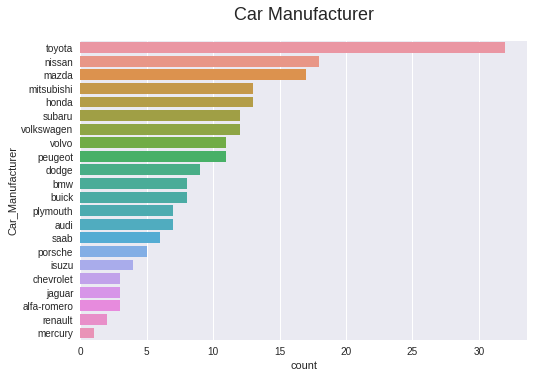

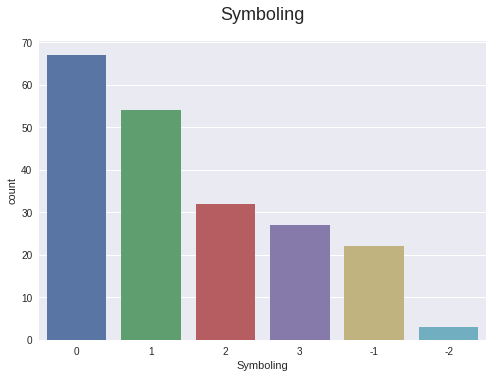

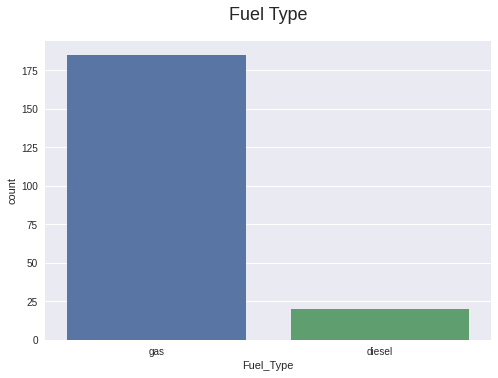

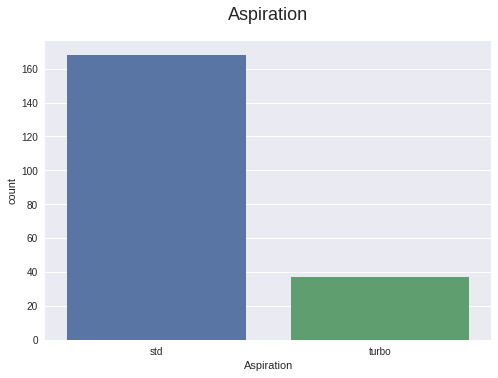

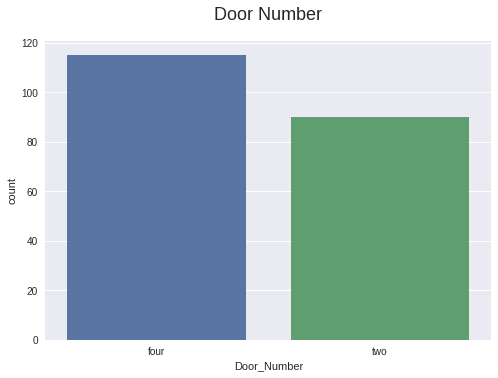

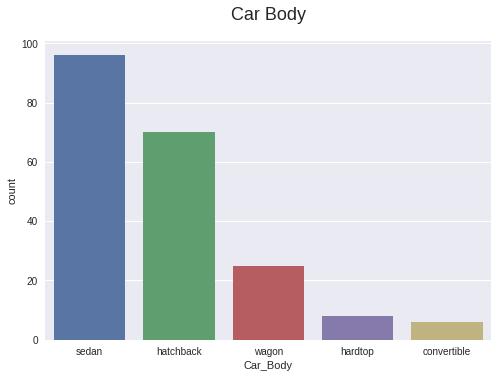

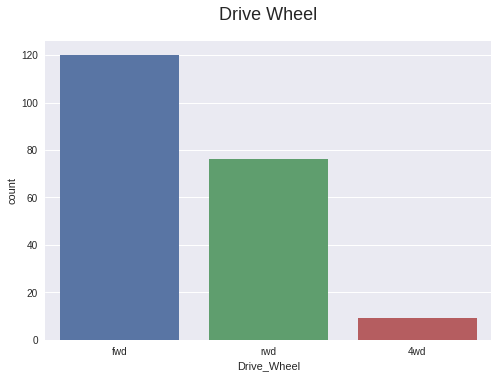

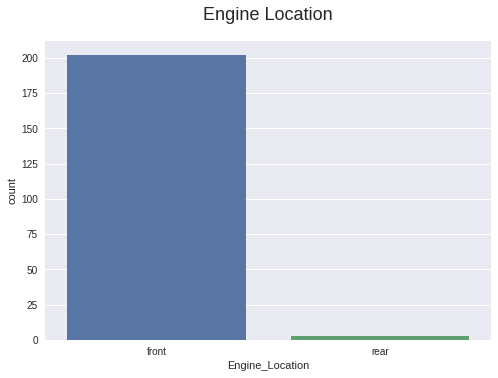

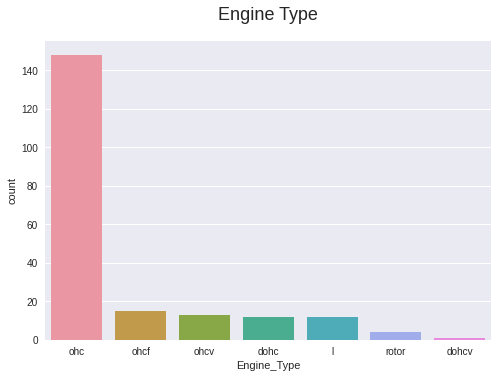

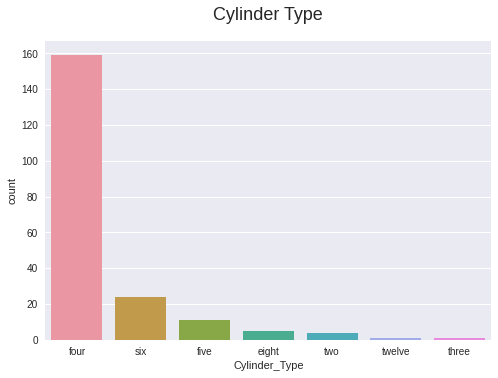

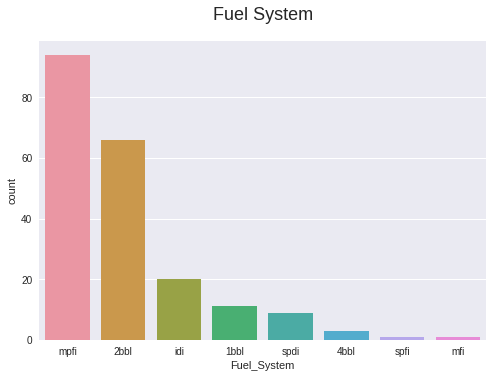

In [219]:
for c in ["Car_Manufacturer","Symboling","Fuel_Type","Aspiration","Door_Number","Car_Body","Drive_Wheel","Engine_Location","Engine_Type","Cylinder_Type","Fuel_System"]:
  plt.title(" ".join(c.split("_")),size=18,y=1.05)
  if c == "Car_Manufacturer":
    sns.countplot(y=df[c],order=df[c].value_counts().index)
  else:
    sns.countplot(df[c],order=df[c].value_counts().index)
  plt.show()

**Plot Numeric Data**

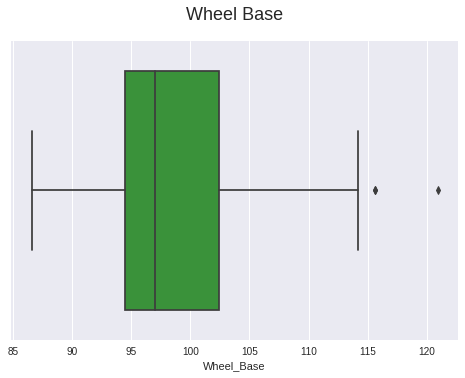

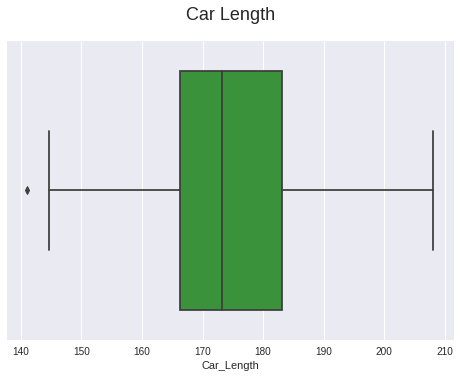

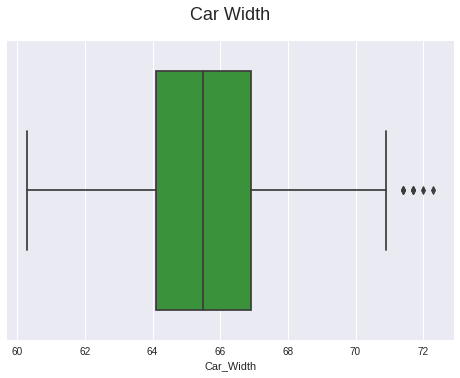

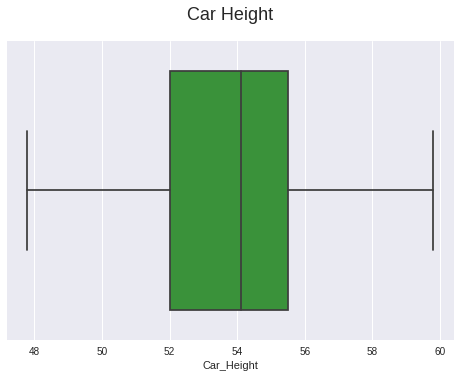

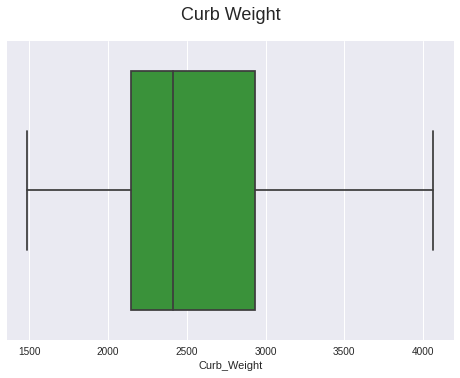

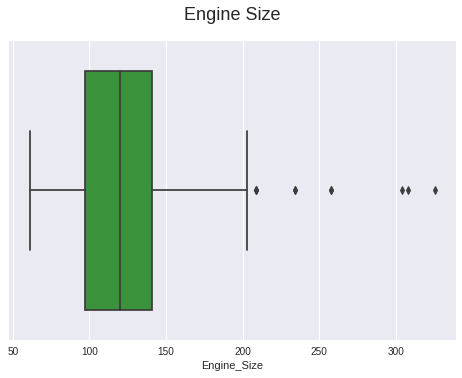

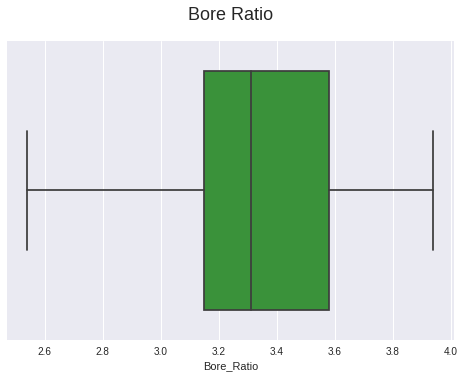

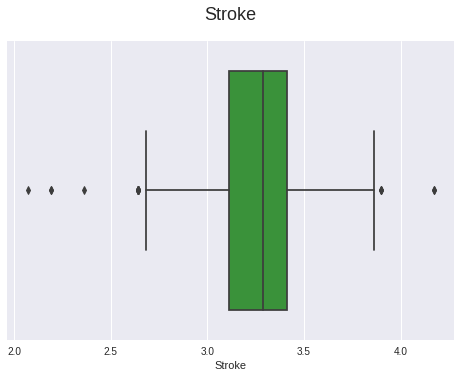

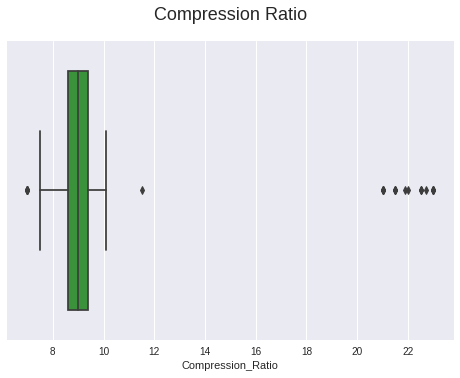

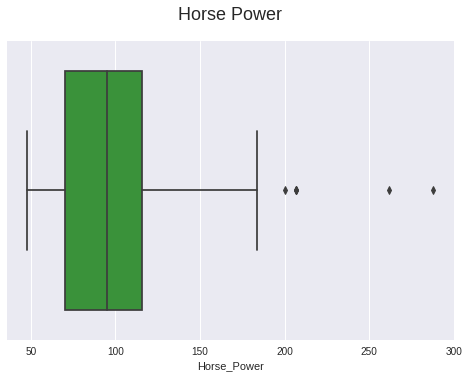

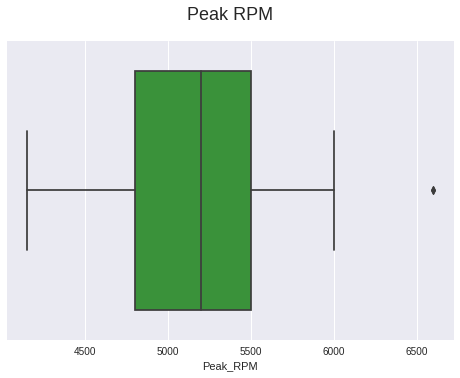

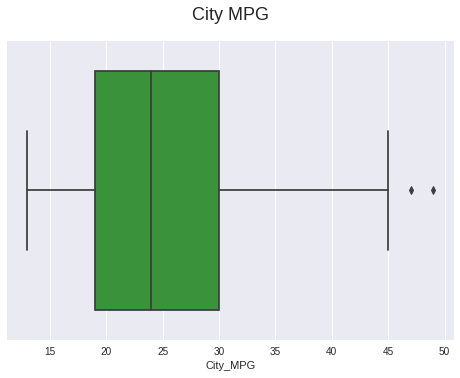

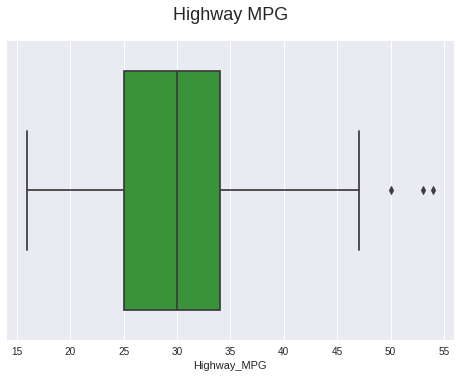

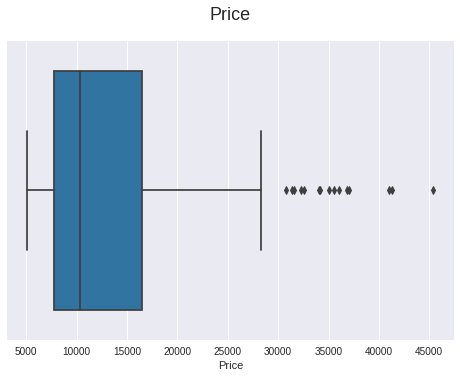

In [220]:
for c in ["Wheel_Base","Car_Length","Car_Width","Car_Height","Curb_Weight","Engine_Size","Bore_Ratio","Stroke","Compression_Ratio","Horse_Power","Peak_RPM","City_MPG","Highway_MPG","Price"]:
  plt.title(" ".join(c.split("_")),size=18,y=1.05)
  if c=="Price":
    sns.boxplot(df[c],color="tab:blue")
  else:
    sns.boxplot(df[c],color="tab:green")
  plt.show()

**Correlation**

In [221]:
corr = df.corr()
corr

,Symboling,Wheel_Base,Car_Length,Car_Width,Car_Height,Curb_Weight,Engine_Size,Bore_Ratio,Stroke,Compression_Ratio,Horse_Power,Peak_RPM,City_MPG,Highway_MPG,Price
Symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
Wheel_Base,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
Car_Length,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
Car_Width,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
Car_Height,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
Curb_Weight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
Engine_Size,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
Bore_Ratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
Stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
Compression_Ratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


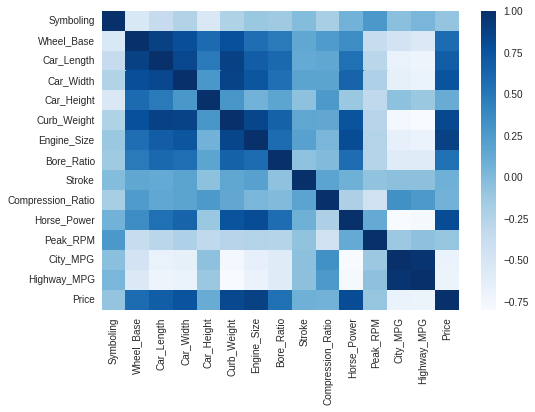

In [222]:
sns.heatmap(corr,cmap="Blues")

In [223]:
corr_target = df.corrwith(df["Price"])
corr_target.reindex(corr_target.abs().sort_values(ascending=False).index)[1:]

Engine_Size          0.874145
Curb_Weight          0.835305
Horse_Power          0.808139
Car_Width            0.759325
Highway_MPG         -0.697599
City_MPG            -0.685751
Car_Length           0.682920
Wheel_Base           0.577816
Bore_Ratio           0.553173
Car_Height           0.119336
Peak_RPM            -0.085267
Symboling           -0.079978
Stroke               0.079443
Compression_Ratio    0.067984
dtype: float64

The top five numerical features that affect the target are:
- Engine Size
- Curb Weight
- Horse Power
- Car Width
- Highway MPG (negative correlation)

### Exploratory Data Analysis (multivariate)

In [224]:
df.head()

,Car_Manufacturer,Car_Model,Symboling,Fuel_Type,Aspiration,Door_Number,Car_Body,Drive_Wheel,Engine_Location,Wheel_Base,Car_Length,Car_Width,Car_Height,Curb_Weight,Engine_Type,Cylinder_Type,Engine_Size,Fuel_System,Bore_Ratio,Stroke,Compression_Ratio,Horse_Power,Peak_RPM,City_MPG,Highway_MPG,Price
Car_ID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,alfa-romero,giulia,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,alfa-romero,stelvio,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,alfa-romero,Quadrifoglio,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,audi,100ls,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,audi,100ls,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


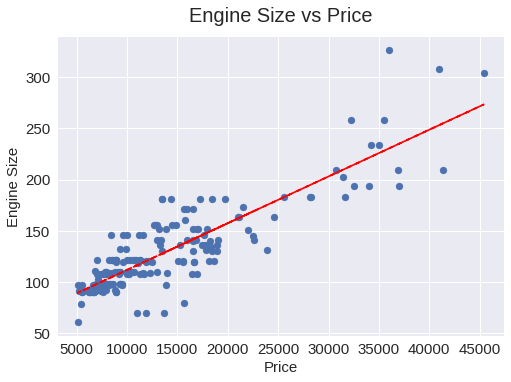

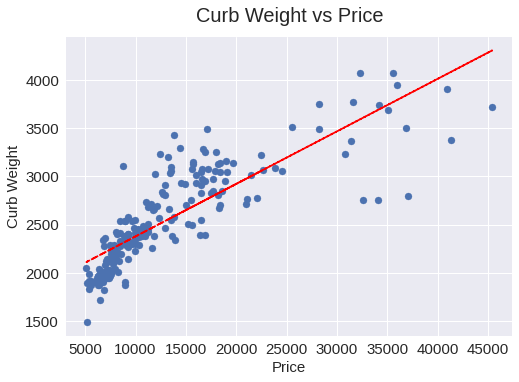

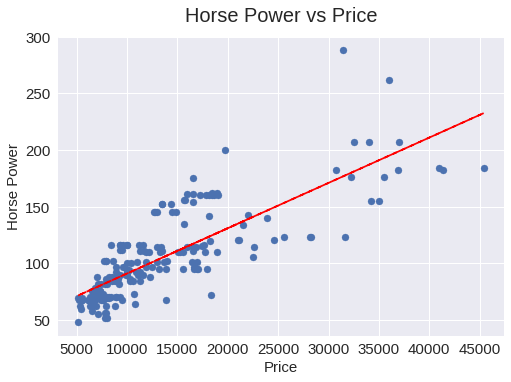

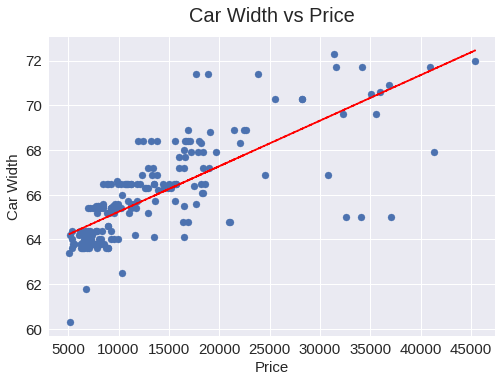

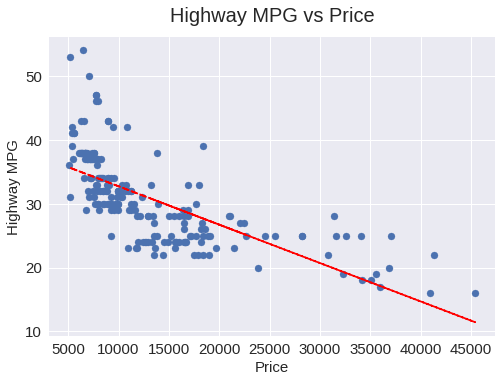

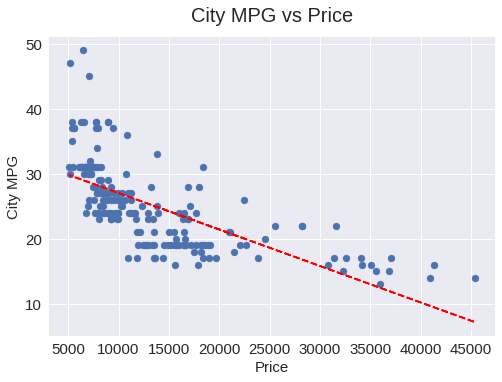

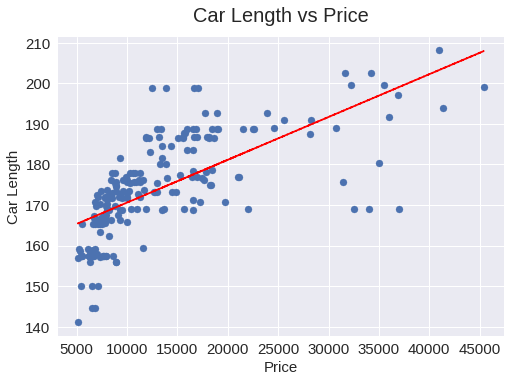

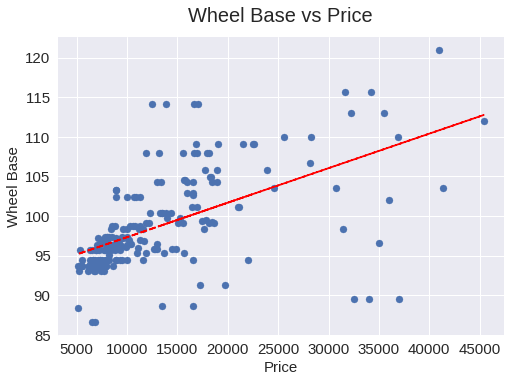

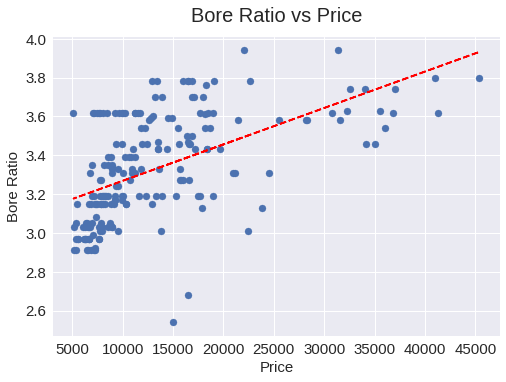

In [225]:
for c in ['Engine_Size','Curb_Weight','Horse_Power','Car_Width','Highway_MPG','City_MPG','Car_Length','Wheel_Base','Bore_Ratio']:
  plt.scatter(df["Price"],df[c])
  z = np.polyfit(df["Price"], df[c], 1)
  p = np.poly1d(z)
  plt.plot(df["Price"], p(df["Price"]), "r--")
  plt.title(c.replace("_"," ") + " vs Price",size=20,y=1.03)
  plt.xlabel("Price",size=15)
  plt.ylabel(c.replace("_"," "),size=15)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.show()

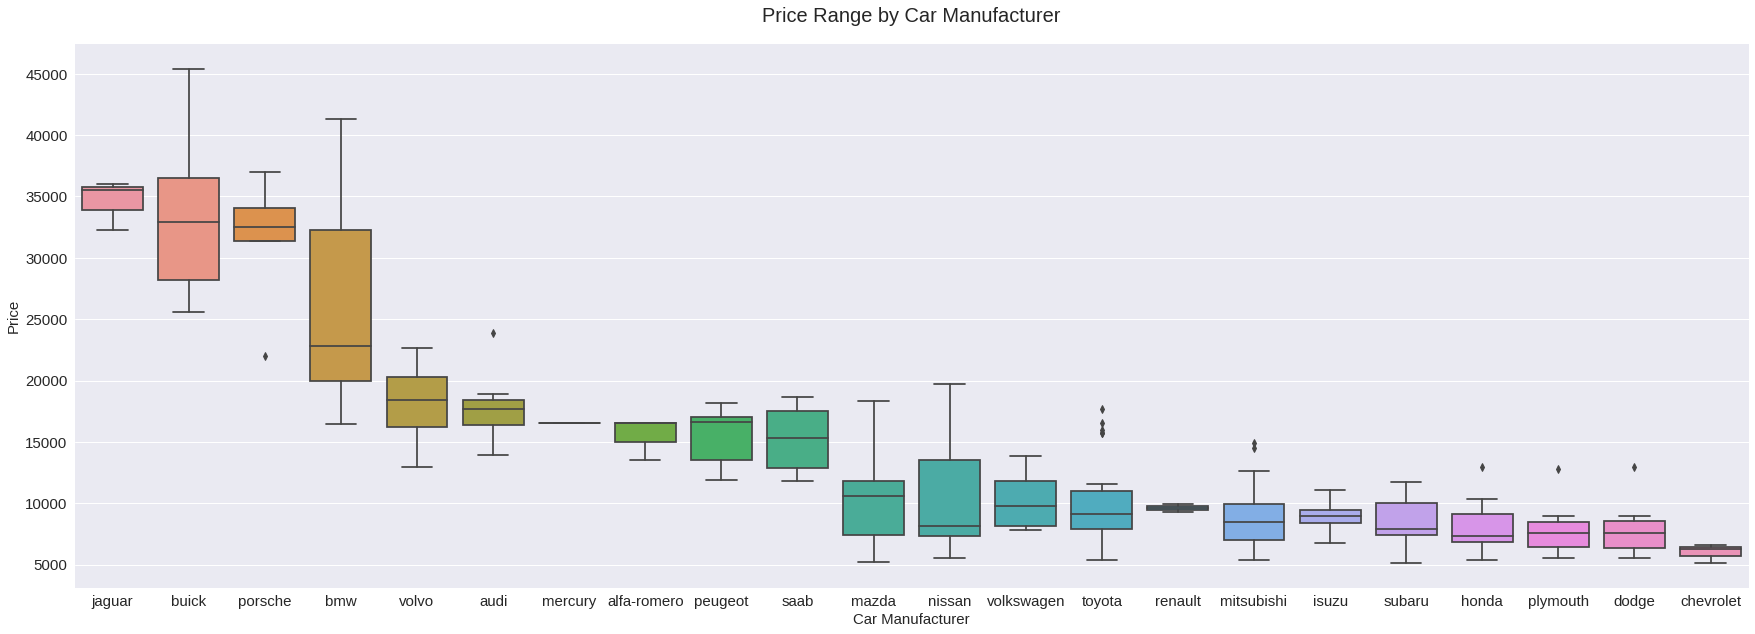

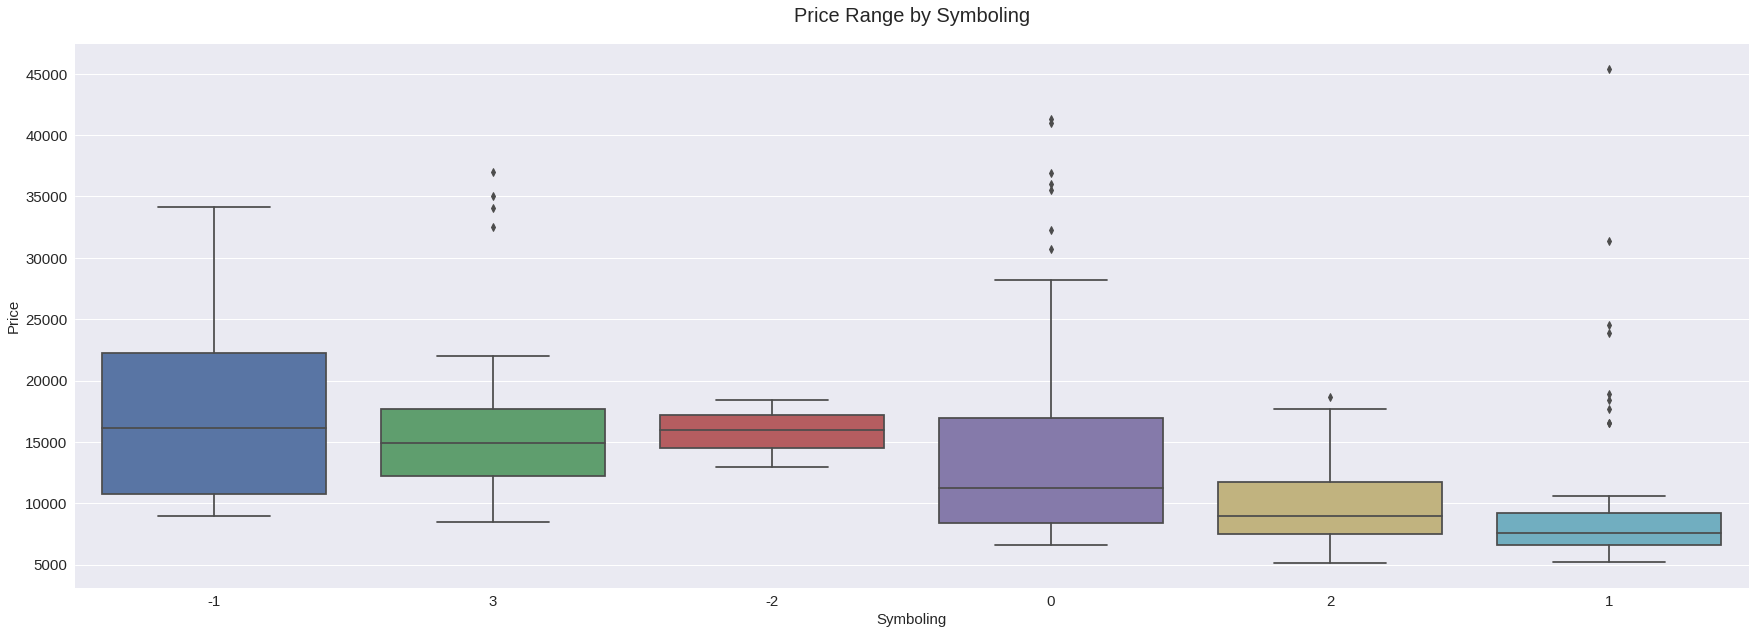

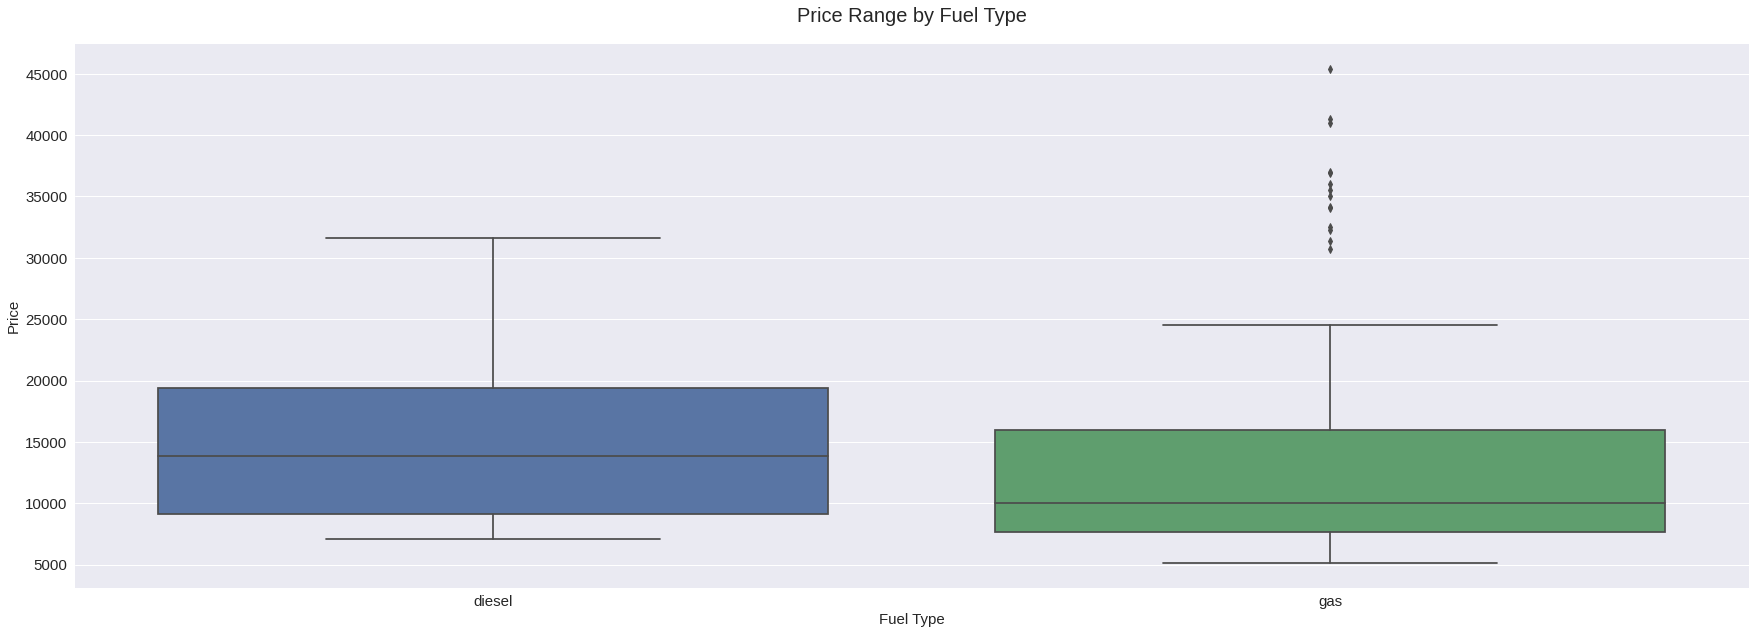

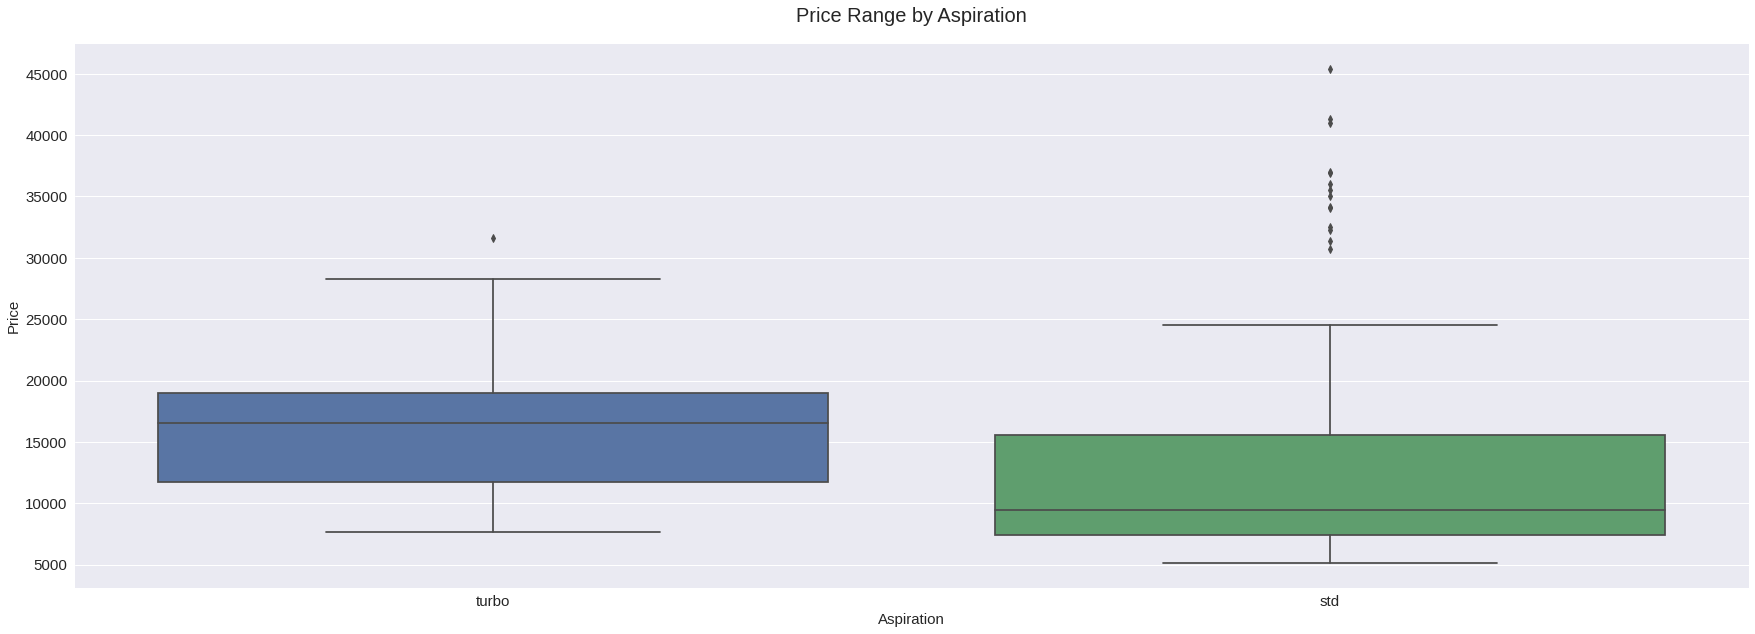

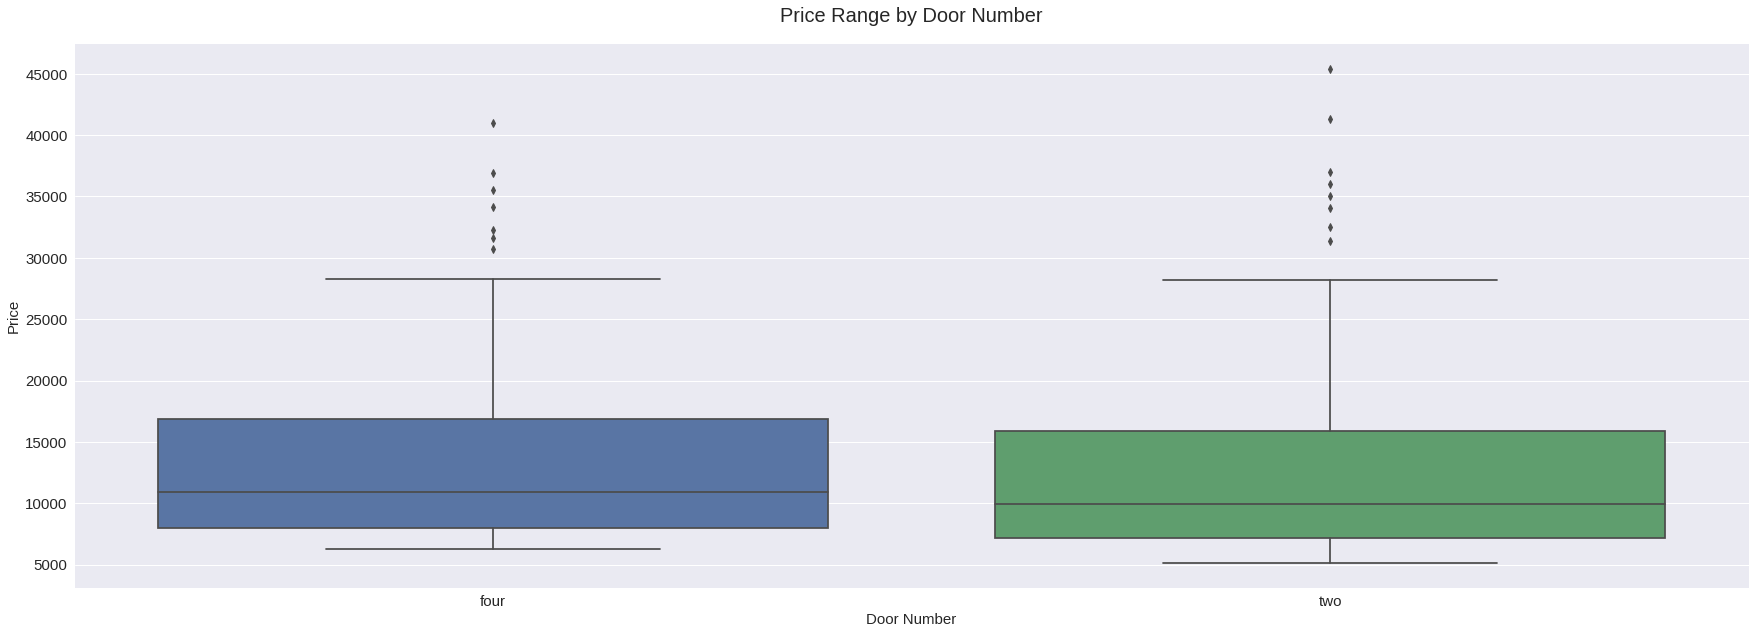

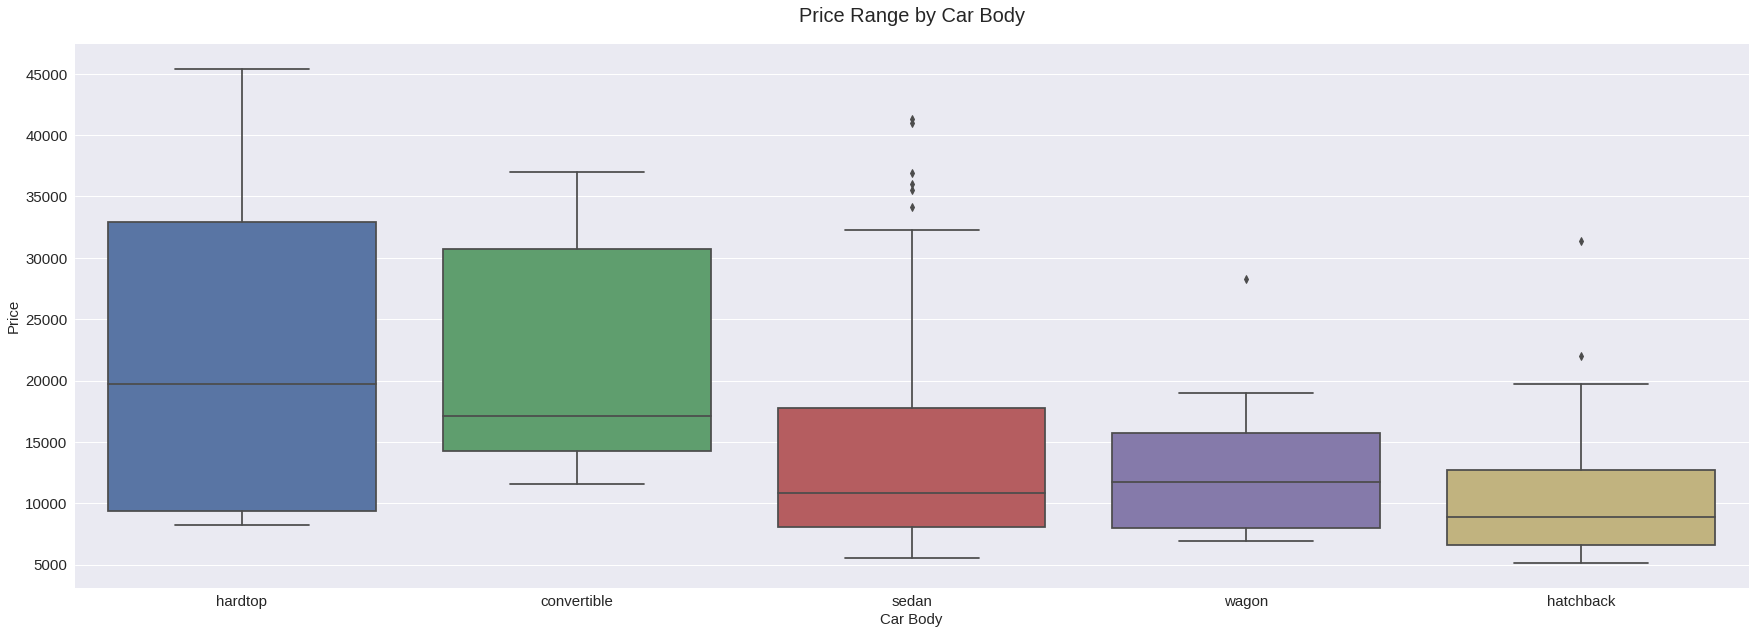

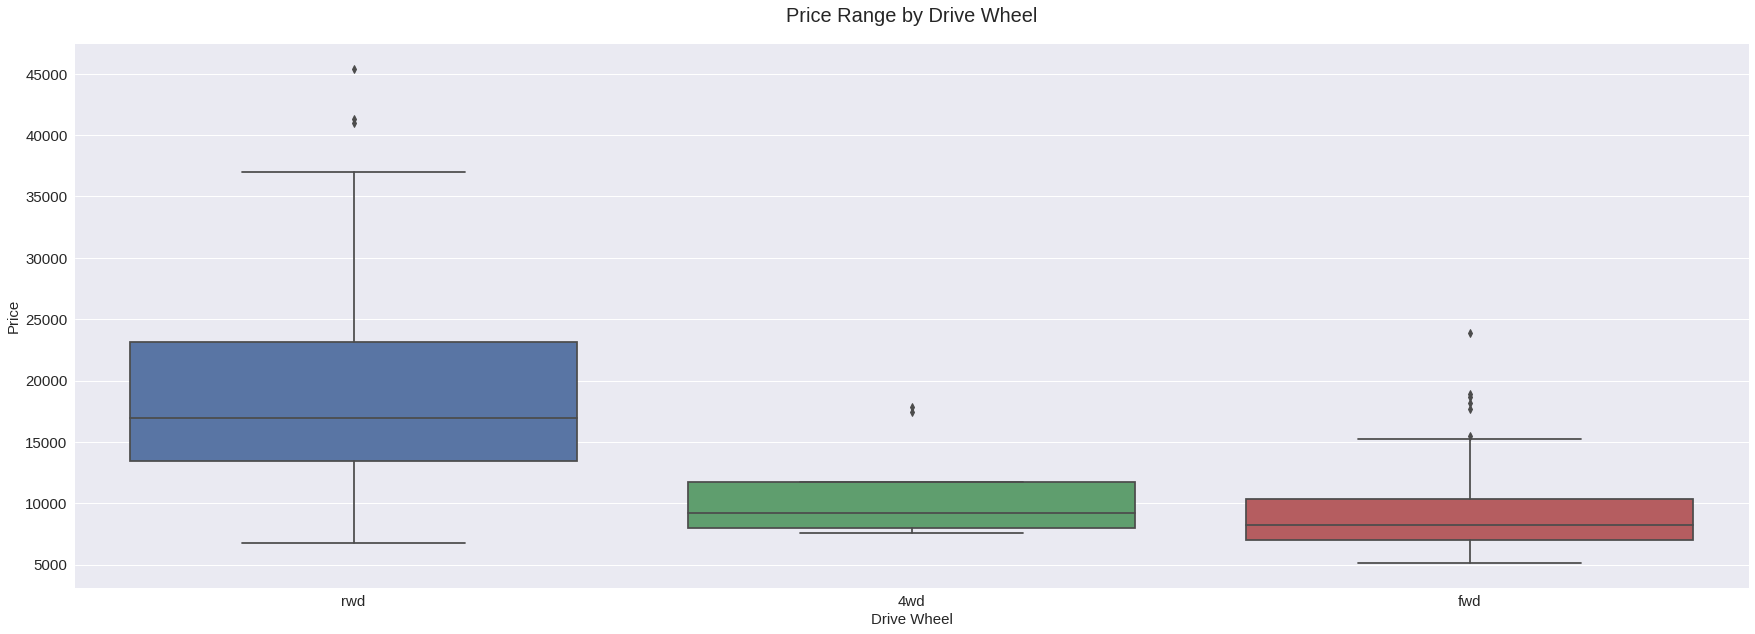

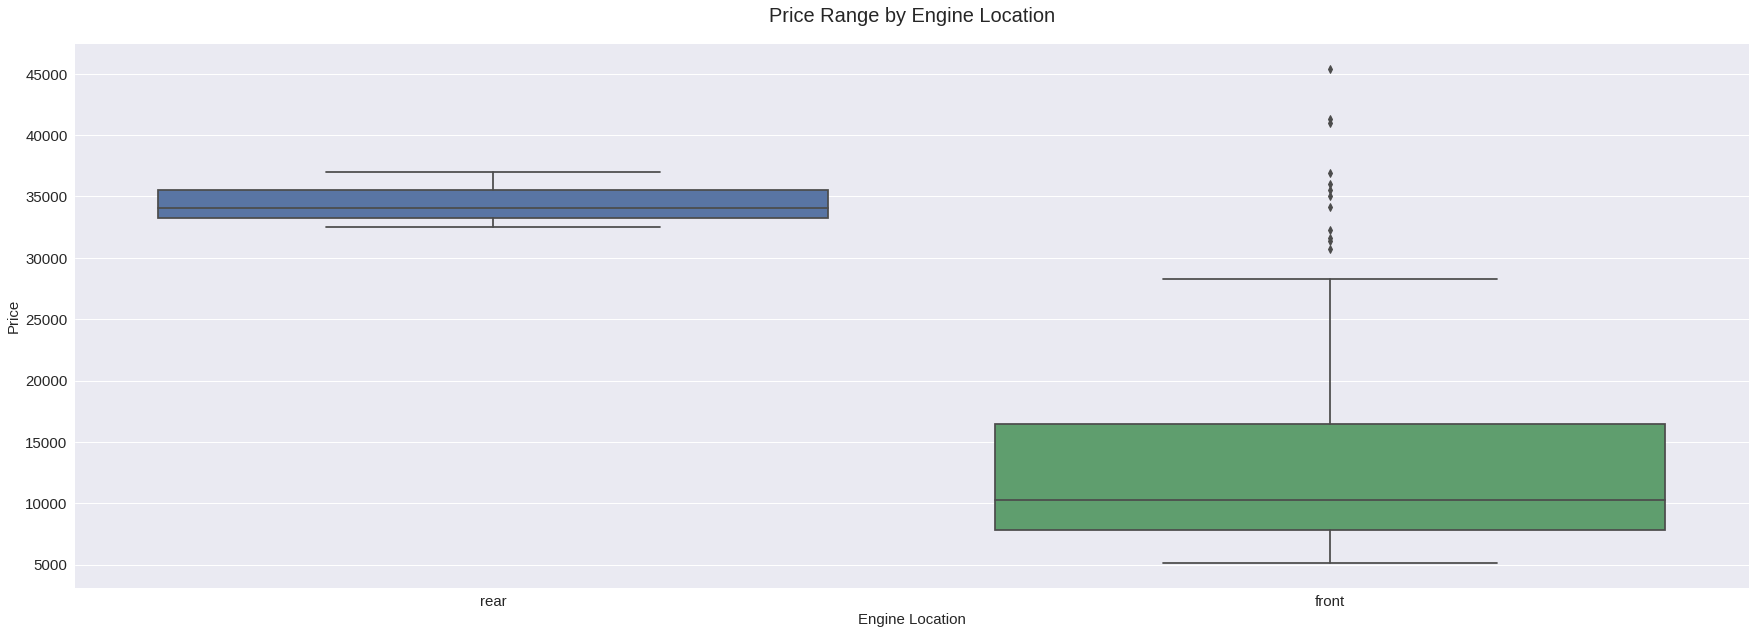

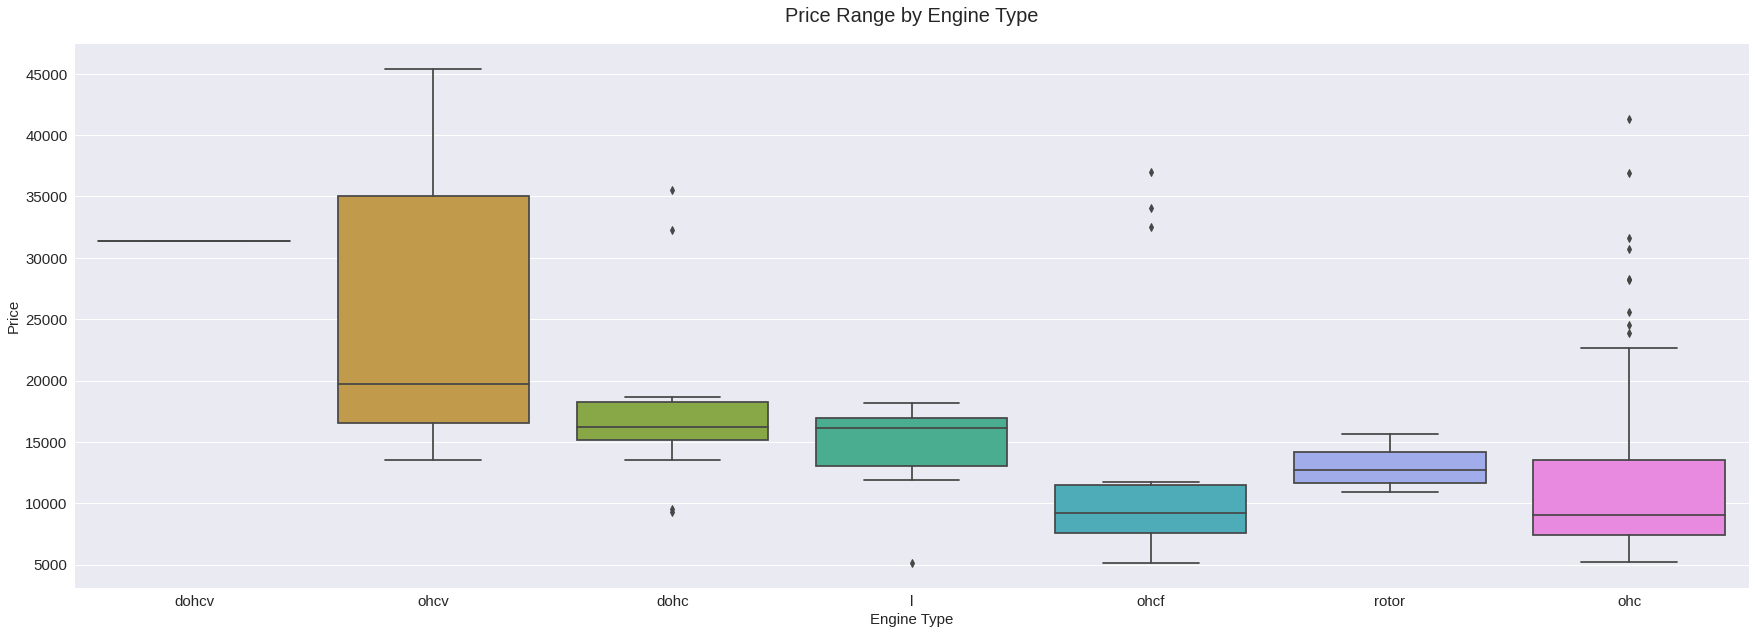

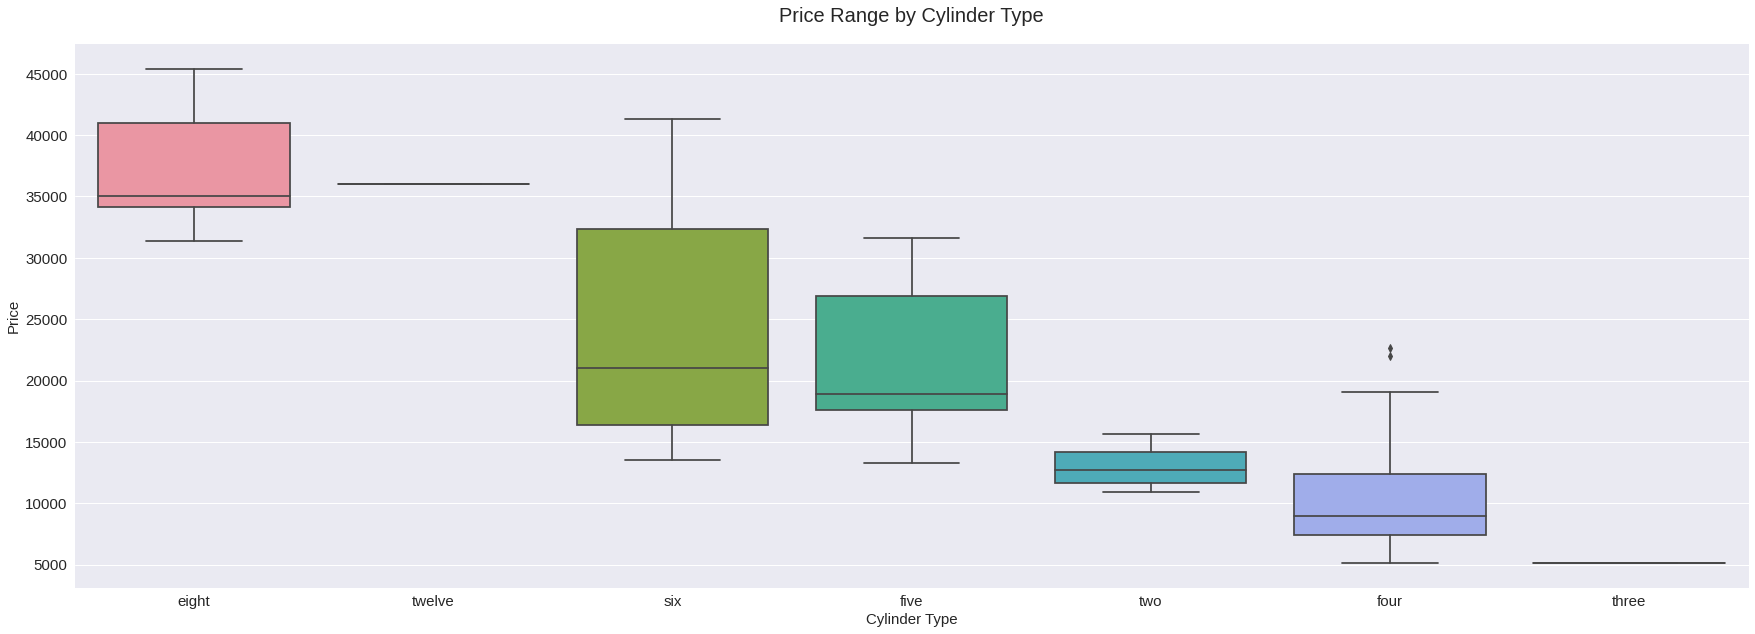

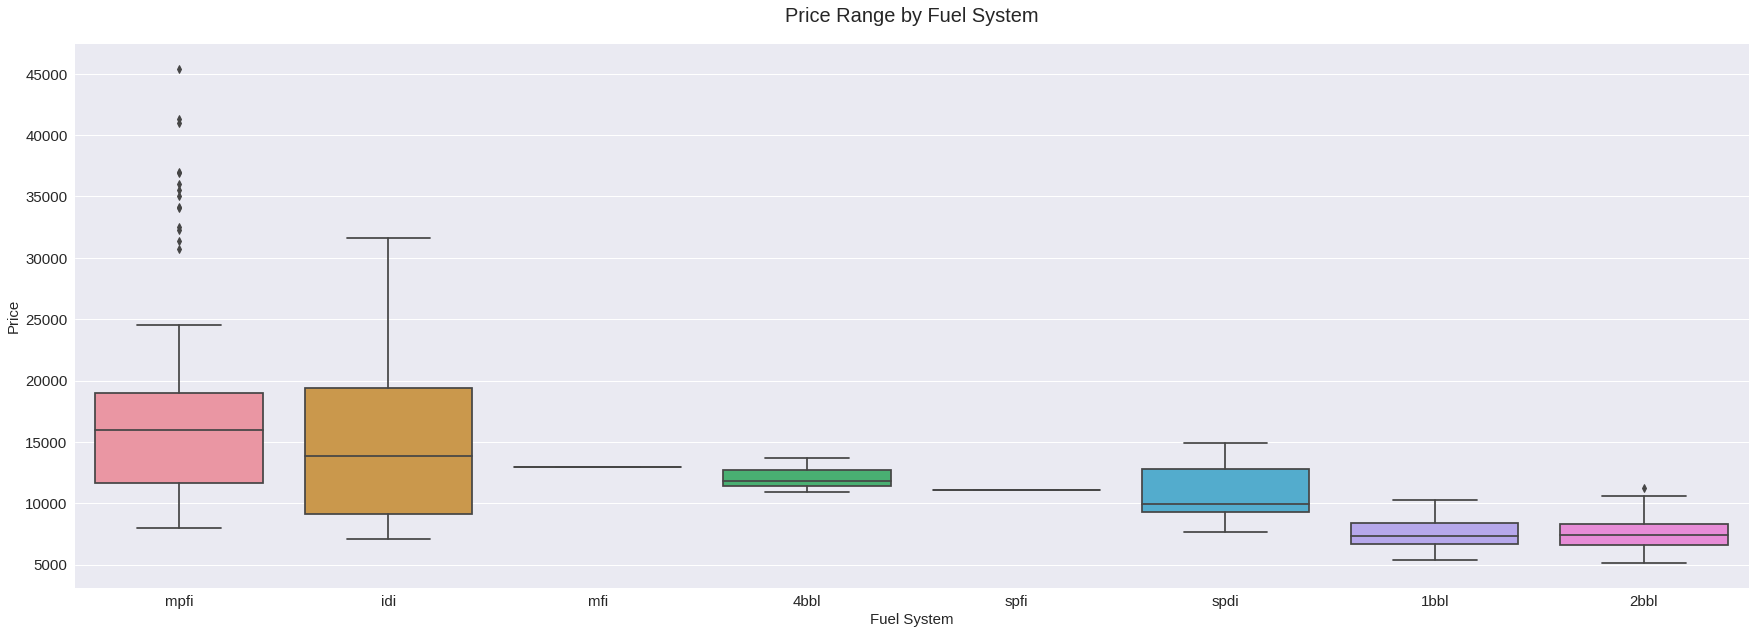

In [226]:
for c in ["Car_Manufacturer","Symboling","Fuel_Type","Aspiration","Door_Number","Car_Body","Drive_Wheel","Engine_Location","Engine_Type","Cylinder_Type","Fuel_System"]:
  ordered_by_mean = df.groupby(c)["Price"].mean().sort_values(ascending=False).keys()
  plt.figure(figsize=(30,10))
  sns.boxplot(data=df,x=c,y="Price",order=ordered_by_mean)
  plt.title("Price Range by " + c.replace("_", " "),size=20,y=1.03)
  plt.xlabel(c.replace("_", " "),size=15)
  plt.ylabel("Price",size=15)
  plt.xticks(fontsize=15)
  plt.yticks(fontsize=15)
  plt.show()

## Week 03

To include in your presentation:

- Intro and background about your data set
- Explanation of the cleaning steps required and a brief explanation of how you addressed them in your data set.
- If there were null values, explain how you addressed them.
- At least two exploratory visuals you used to understand your data set and what you learned from each.
- If relevant, any unique challenges you encountered while working with this data set and how you handled them.  
- Commit your slide deck and video to your GitHub repository. 
- Large files can be saved on Google Drive and the link can be added to GitHub. Ensure that the share settings allow anyone with the link to view the file.